<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Word-counting" data-toc-modified-id="Word-counting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Word counting</a></span></li><li><span><a href="#Using-less-memory" data-toc-modified-id="Using-less-memory-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using less memory</a></span></li><li><span><a href="#Tfid-relative-to-corpus-scoring" data-toc-modified-id="Tfid-relative-to-corpus-scoring-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tfid relative to corpus scoring</a></span></li></ul></div>

In [42]:
spam = """
Hello,\nI saw your contact information on LinkedIn. I have carefully read through your profile and you seem to have an outstanding personality. This is one major reason why I am in contact with you. My name is Mr. Valery Grayfer Chairman of the Board of Directors of PJSC "LUKOIL". I am 86 years old and I was diagnosed with cancer 2 years ago. I will be going in for an operation later this week. I decided to WILL/Donate the sum of 8,750,000.00 Euros(Eight Million Seven Hundred And Fifty Thousand Euros Only etc. etc.
"""

ham = """
Hello, \nI am writing in regards to your application to the position of Data Scientist at Hooli X. We are pleased to inform you that you passed the first round of interviews and we would like to invite you for an on-site interview with our Senior Data Scientist Mr. John Smith. You will find attached to this message further information on date, time and location of the interview. Please let me know if I can be of any further assistance. Best Regards.
"""
print(spam)
print(type(spam))
print()
print(ham)
print(type(ham))


Hello,
I saw your contact information on LinkedIn. I have carefully read through your profile and you seem to have an outstanding personality. This is one major reason why I am in contact with you. My name is Mr. Valery Grayfer Chairman of the Board of Directors of PJSC "LUKOIL". I am 86 years old and I was diagnosed with cancer 2 years ago. I will be going in for an operation later this week. I decided to WILL/Donate the sum of 8,750,000.00 Euros(Eight Million Seven Hundred And Fifty Thousand Euros Only etc. etc.

<class 'str'>


Hello, 
I am writing in regards to your application to the position of Data Scientist at Hooli X. We are pleased to inform you that you passed the first round of interviews and we would like to invite you for an on-site interview with our Senior Data Scientist Mr. John Smith. You will find attached to this message further information on date, time and location of the interview. Please let me know if I can be of any further assistance. Best Regards.

<class '

## Word counting

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(token_pattern='\w+')
cmat = cvec.fit_transform([spam, ham])

In [62]:
import pandas as pd

df = pd.DataFrame(cvec.transform([spam, ham]).todense(),
                 columns=cvec.get_feature_names())

df.transpose().sort_values(0, ascending=False).transpose()

,i,of,and,your,is,contact,have,the,this,etc,to,euros,with,an,am,will,you,in,years,linkedin,one,on,old,my,name,mr,million,000,lukoil,major,read,only,operation,why,week,was,valery,through,thousand,sum,seven,seem,saw,reason,profile,pjsc,personality,outstanding,later,00,cancer,chairman,directors,be,donate,eight,fifty,for,board,going,grayfer,decided,hello,ago,hundred,86,8,carefully,information,750,2,diagnosed,smith,site,that,best,can,attached,interviews,at,time,senior,are,application,we,any,would,writing,x,assistance,date,scientist,round,interview,john,know,let,inform,if,location,hooli,me,message,further,first,find,our,passed,please,pleased,position,invite,data,regards,like
0,7,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4,2,1,0,0,0,3,1,0,5,0,1,1,1,1,4,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1


In [30]:
cvec = CountVectorizer(token_pattern='\w+',
                       stop_words='english',
                       ngram_range=(1, 2), #ngram start 1 top 2
                       max_features=30,
                       min_df=1)

In [31]:
import pandas as pd

df = pd.DataFrame(cvec.fit_transform([spam, ham]).todense(),
                  columns=cvec.get_feature_names())

df.transpose().sort_values(0, ascending=False).transpose()

,years,euros,contact,major,pjsc lukoil,pjsc,personality major,personality,outstanding personality,mr,major reason,00,lukoil 86,information,lukoil,hello,operation later,passed,passed round,interview,location,location interview,data,pleased,pleased inform,position,position data,regards,scientist,data scientist
0,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,2,1,1,2,1,1,1,1,2,2,2


In [64]:
document_matrix = cvec.transform([spam, ham])
document_matrix#.todense()

<2x115 sparse matrix of type '<class 'numpy.int64'>'
	with 134 stored elements in Compressed Sparse Row format>

## Using less memory

In [20]:
from sklearn.feature_extraction.text import HashingVectorizer

hvec = HashingVectorizer(binary=True, norm='l2')
hvec.fit([spam])

HashingVectorizer(alternate_sign=True, analyzer='word', binary=True,
                  decode_error='strict', dtype=<class 'numpy.float64'>,
                  encoding='utf-8', input='content', lowercase=True,
                  n_features=1048576, ngram_range=(1, 1), norm='l2',
                  preprocessor=None, stop_words=None, strip_accents=None,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)

In [21]:
#
# .todense() returns it in scipy matrix format.
#
df = pd.DataFrame(hvec.transform([spam, ham]).todense())

df.sort_values(0, ascending=False, axis=1).iloc[:, :20]

,288820,604779,832412,608416,921249,189643,921400,348547,144749,948532,36459,449291,980458,702277,646934,946487,134503,218909,1019171,979482
0,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386,0.120386
1,0.000000,0.000000,0.129099,0.000000,0.000000,0.129099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129099,0.000000,0.000000


## Tfid relative to corpus scoring

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
tvec.fit([spam, ham]) #list of strings

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [23]:
df = pd.DataFrame(tvec.transform([spam, ham]).todense(),
                  columns=tvec.get_feature_names(),
                  index=['spam', 'ham'])

df.transpose().sort_values('spam', ascending=False).head(10).transpose()

,00 euros,information linkedin,000 00,linkedin carefully,lukoil 86,major reason,million seven,mr valery,old diagnosed,operation later
spam,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303
ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


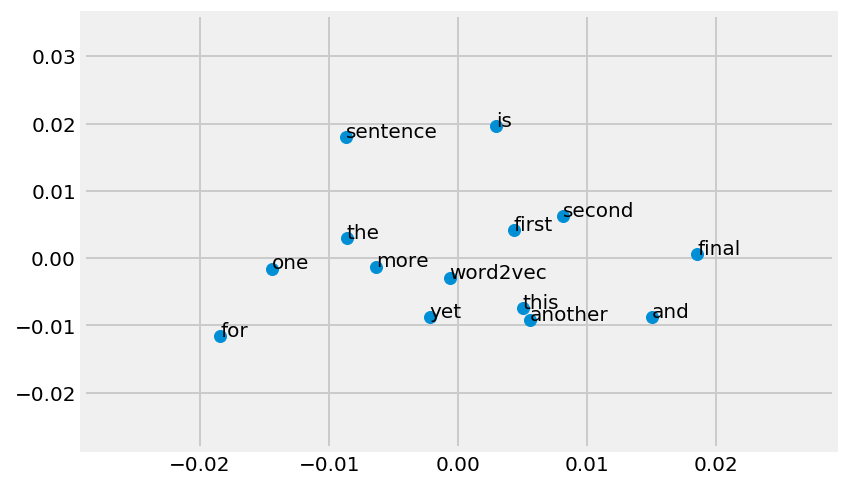

In [24]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [25]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-3.0703128e-03 -3.8852317e-03  3.9202343e-03 -4.9836007e-03
 -5.2165455e-04 -4.2885155e-03  3.1502559e-03 -3.9390665e-03
  4.5411498e-03  3.9637513e-03 -8.4154098e-04 -1.7526014e-03
  2.9257082e-03  3.1105492e-03 -2.2196125e-03  5.8384938e-04
  1.5208361e-03 -1.4916922e-03  1.5827020e-03  2.8226336e-03
  1.0601655e-04 -3.1450640e-03  4.1903346e-03 -2.8431674e-03
 -3.2631897e-03 -1.7429796e-03 -1.8734124e-03  3.3928866e-03
 -2.6217473e-03  4.3874057e-03 -3.1342623e-03 -2.0282783e-03
  6.4615265e-04 -3.0569471e-03  3.4321323e-03 -2.6034154e-03
  2.5406663e-04  5.1346127e-05 -1.3404652e-03  2.2960263e-03
  6.7056797e-04 -1.7134490e-03  4.8194197e-03 -2.0775127e-03
 -3.9043804e-03 -4.7031478e-03 -4.5380518e-03  3.7729386e-03
  2.0203969e-04 -4.4983896e-04  2.1076130e-03 -2.5998116e-03
 -4.6033929e-03  8.0581731e-04 -2.0875687e-0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [26]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [36]:
#! python -m spacy download en_core_web_md

     |████████████████████████████████| 120.9MB 12.3MB/s eta 0:00:01     |███████████████████████████████▌| 118.9MB 12.3MB/s eta 0:00:01
  Stored in directory: /private/var/folders/qv/232gv52d2ql2tjf70n472lwm0000gq/T/pip-ephem-wheel-cache-8qa8yryc/wheels/db/5d/d0/ccdad6b01f9695b4a33793158530b3228223ee31463441663d
Successfully built en-core-web-md

    Linking successful
    /anaconda3/lib/python3.6/site-packages/en_core_web_md -->
    /anaconda3/lib/python3.6/site-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [39]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')
# process a sentence using the model
doc = nlp(spam)
# It's that simple - all of the vectors and words are assigned after this point
# Get the vector for 'text':
doc[3].vector
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([ 4.49319929e-03,  2.07835272e-01, -1.40706867e-01, -8.67592171e-02,
        6.69212416e-02, -3.62479053e-02,  2.06302963e-02, -1.79928690e-01,
        4.75331657e-02,  1.98304510e+00, -2.27027819e-01,  1.09626666e-01,
        7.08066002e-02, -9.57357958e-02, -5.44659197e-02, -6.19916953e-02,
       -7.23431036e-02,  1.09120250e+00, -1.81966737e-01,  3.26658809e-03,
       -1.61934681e-02,  1.40905392e-03, -9.58189890e-02, -3.08837071e-02,
        4.75522131e-02,  1.27230687e-02, -1.16757140e-01, -2.92831101e-02,
        7.09031299e-02,  1.23590752e-02,  4.94755730e-02,  4.45612893e-02,
        1.02694966e-02,  6.19371831e-02, -1.73286945e-02, -2.11196896e-02,
       -5.29378057e-02,  1.21851079e-02, -5.18435352e-02, -2.26598401e-02,
       -3.39990035e-02,  2.47420333e-02,  4.64080125e-02, -9.87100601e-02,
       -1.68159325e-02,  4.56144772e-02, -1.07424639e-01,  5.46358014e-03,
        4.04500514e-02, -6.03609579e-03, -6.10185489e-02, -2.17136685e-02,
        2.84118708e-02, -

In [40]:
doc.vector.shape

(300,)

In [41]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point
# Get the vector for 'text':
doc[3].vector
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([-5.36412969e-02,  2.79353321e-01, -1.05259977e-01, -1.76284965e-02,
        1.34550199e-01,  1.92671806e-01,  5.50469756e-03, -2.39132687e-01,
       -4.06342074e-02,  1.78010297e+00, -1.80772960e-01,  1.02661893e-01,
        6.84069991e-02, -5.09319194e-02, -7.65837058e-02, -3.77540514e-02,
        8.24129581e-03,  1.37752008e+00, -1.78934380e-01, -5.76109104e-02,
        1.66338980e-02, -3.62196006e-02, -7.48579949e-02,  4.40651290e-02,
       -2.65241470e-02,  2.41529979e-02,  9.79370065e-03, -1.13990309e-03,
        1.59522101e-01, -1.56648397e-01, -9.12139937e-02,  9.11872908e-02,
        1.07169405e-01, -1.08843103e-01, -7.94988051e-02, -4.74919155e-02,
       -1.60613850e-01, -2.82304995e-02, -1.03425637e-01, -1.14933215e-01,
        1.62531182e-01, -1.01342008e-01,  2.17013666e-03,  3.47881988e-02,
       -6.34927005e-02,  2.44374484e-01, -3.01910043e-02, -1.46046979e-02,
       -1.06488302e-01,  6.26319647e-03, -1.30655810e-01,  7.04905912e-02,
       -4.86716032e-02,  

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X_train = corpus
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer())
              ])
test = nb.fit_transform(X_train)

# %%time
# from sklearn.metrics import classification_report
# y_pred = nb.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

In [85]:
test.todense()

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X_train = ['ham', 'spam']
nb = Pipeline([('vect', CountVectorizer())
              ])
test = nb.fit_transform(X_train)

# %%time
# from sklearn.metrics import classification_report
# y_pred = nb.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))

In [79]:
test.todense()

matrix([[1, 0],
        [0, 1]], dtype=int64)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)
